# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [137]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [138]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?


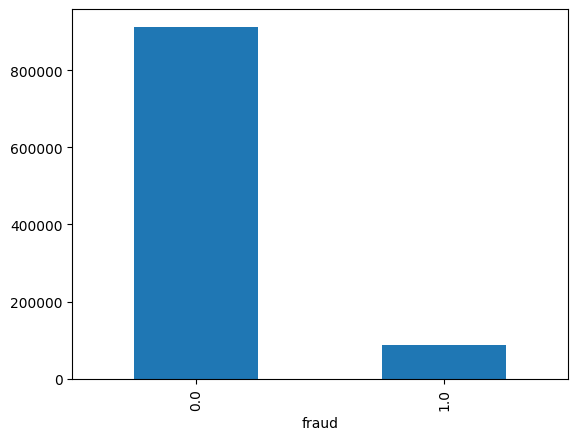

In [139]:
target = fraud["fraud"].value_counts()
target.plot(kind="bar")
plt.show()

- **2.** Train a LogisticRegression.


In [140]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [141]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.


In [143]:
log_reg.score(X_test_scaled, y_test)

0.959236

In [144]:
pred = log_reg.predict(X_test_scaled)
natural_state = classification_report(y_pred = pred, y_true = y_test)
print(natural_state)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228047
         1.0       0.90      0.60      0.72     21953

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 


In [145]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)
train.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,-0.386410,0.243088,-0.530459,-2.72829,-0.7337,-0.33399,-1.363098
1,0.710320,-0.164946,0.761089,0.36653,-0.7337,-0.33399,0.733623
2,-0.066139,-0.181770,-0.580121,0.36653,-0.7337,-0.33399,0.733623
3,-0.009921,-0.038537,-0.294324,0.36653,-0.7337,-0.33399,0.733623
4,0.459705,-0.112945,0.360935,0.36653,-0.7337,-0.33399,-1.363098


In [146]:
train["fraud"] = y_train.values

In [147]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [148]:
# Oversampling
fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [149]:
train_over = pd.concat([fraud_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
32422,-0.259904,-0.004525,2.442509,0.36653,-0.733700,-0.333990,0.733623,1.0
501376,-0.265302,0.407521,0.805503,0.36653,1.362954,-0.333990,0.733623,1.0
490493,-0.235992,-0.186663,0.995070,0.36653,1.362954,-0.333990,0.733623,1.0
601499,-0.320700,-0.128190,1.451021,0.36653,1.362954,-0.333990,0.733623,1.0
528492,-0.347511,-0.173316,1.254460,0.36653,1.362954,-0.333990,0.733623,1.0
...,...,...,...,...,...,...,...,...
749995,-0.134817,-0.137410,0.216499,0.36653,-0.733700,2.994104,0.733623,0.0
749996,-0.305244,-0.171458,0.403090,0.36653,1.362954,2.994104,-1.363098,0.0
749997,0.199470,0.052741,-0.449947,0.36653,-0.733700,2.994104,0.733623,0.0
749998,0.163332,0.074863,0.100266,0.36653,-0.733700,-0.333990,0.733623,0.0


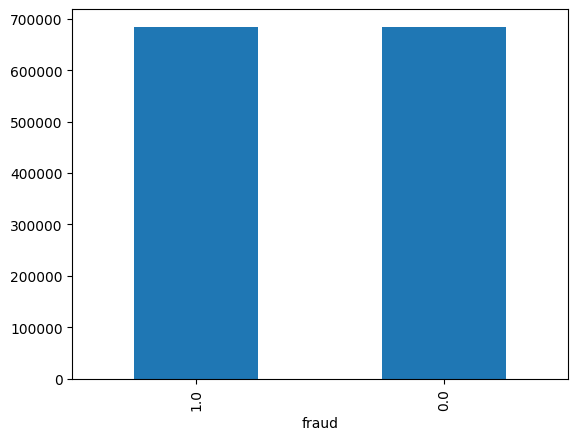

In [150]:
target = train_over["fraud"].value_counts()
target.plot(kind="bar")
plt.show()

In [151]:
features = train_over.drop(columns = ["fraud"])
target = train_over["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [152]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [153]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [154]:
log_reg_over = LogisticRegression()
log_reg_over.fit(X_train_scaled, y_train)

LogisticRegression()

In [155]:
log_reg_over.score(X_test_scaled, y_test)

0.9408428894894456

In [156]:
pred_over = log_reg.predict(X_test_scaled)
oversampling = classification_report(y_pred = pred_over, y_true = y_test)
print(oversampling)

              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69    171199
         1.0       0.99      0.11      0.20    171076

    accuracy                           0.56    342275
   macro avg       0.76      0.56      0.45    342275
weighted avg       0.76      0.56      0.45    342275



- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?

In [157]:
# Undersampling
fraud_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
fraud_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
577828,-0.291390,-0.187126,-0.251760,0.36653,-0.733700,-0.333990,-1.363098,0.0
718166,-0.319527,-0.124947,0.123207,0.36653,-0.733700,-0.333990,-1.363098,0.0
234772,-0.361514,-0.110147,-0.554542,0.36653,-0.733700,-0.333990,0.733623,0.0
586135,0.464049,-0.188003,0.469300,0.36653,1.362954,-0.333990,0.733623,0.0
520278,-0.350019,0.026960,-0.378508,0.36653,-0.733700,-0.333990,-1.363098,0.0
...,...,...,...,...,...,...,...,...
102385,-0.231274,-0.167941,-0.454743,0.36653,1.362954,2.994104,-1.363098,0.0
564017,-0.317085,-0.179335,2.998550,0.36653,1.362954,-0.333990,-1.363098,0.0
371937,0.463852,-0.186426,0.646880,0.36653,1.362954,2.994104,0.733623,0.0
576771,-0.348286,-0.172862,-0.451847,0.36653,1.362954,-0.333990,0.733623,0.0


In [158]:
train_under = pd.concat([fraud, fraud_undersampled])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
12,-0.334935,-0.145790,1.666048,0.36653,-0.733700,-0.333990,0.733623,1.0
14,-0.105677,1.725326,-0.250247,0.36653,-0.733700,-0.333990,0.733623,1.0
21,-0.259624,2.039611,-0.373555,0.36653,-0.733700,-0.333990,0.733623,1.0
30,-0.265170,-0.090076,1.157758,0.36653,-0.733700,-0.333990,0.733623,1.0
41,2.002328,0.927202,0.661969,0.36653,-0.733700,-0.333990,0.733623,1.0
...,...,...,...,...,...,...,...,...
102385,-0.231274,-0.167941,-0.454743,0.36653,1.362954,2.994104,-1.363098,0.0
564017,-0.317085,-0.179335,2.998550,0.36653,1.362954,-0.333990,-1.363098,0.0
371937,0.463852,-0.186426,0.646880,0.36653,1.362954,2.994104,0.733623,0.0
576771,-0.348286,-0.172862,-0.451847,0.36653,1.362954,-0.333990,0.733623,0.0


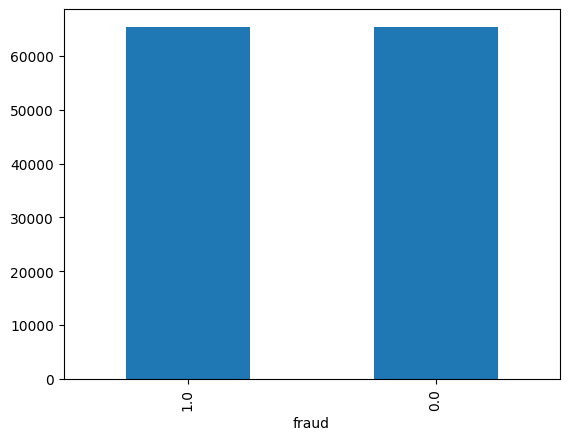

In [159]:
target = train_under["fraud"].value_counts()
target.plot(kind="bar")
plt.show()

In [160]:
features = train_under.drop(columns = ["fraud"])
target = train_under["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [161]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [162]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [163]:
log_reg_under = LogisticRegression()
log_reg_under.fit(X_train_scaled, y_train)

LogisticRegression()

In [164]:
log_reg_under.score(X_test_scaled, y_test)

0.9431321619556914

In [165]:
pred_under = log_reg_under.predict(X_test_scaled)
undersampling = classification_report(y_pred = pred_under, y_true = y_test)
print(undersampling)

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     16300
         1.0       0.94      0.95      0.94     16425

    accuracy                           0.94     32725
   macro avg       0.94      0.94      0.94     32725
weighted avg       0.94      0.94      0.94     32725



- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [166]:
# SMOTE
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [167]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [168]:
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [169]:
log_reg_smote.score(X_test_scaled, y_test)

0.9430710466004584

In [170]:
pred_smote = log_reg_smote.predict(X_test_scaled)
smote_results = classification_report(y_pred = pred_under, y_true = y_test)
print(smote_results)

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     16300
         1.0       0.94      0.95      0.94     16425

    accuracy                           0.94     32725
   macro avg       0.94      0.94      0.94     32725
weighted avg       0.94      0.94      0.94     32725



- **7.** Conclusions

In [175]:
print("Natural State")
print(log_reg.score(X_test_scaled, y_test)),
print("Oversampling") 
print(log_reg_over.score(X_test_scaled, y_test)),
print("Undersampling") 
print(log_reg_under.score(X_test_scaled, y_test)),
print("SMOTE") 
print(log_reg_smote.score(X_test_scaled, y_test))

Natural State
0.5531550802139037
Oversampling
0.9435294117647058
Undersampling
0.9431321619556914
SMOTE
0.9430710466004584


In [173]:
print("Natural State")
print(natural_state),
print("Oversampling") 
print(oversampling),
print("Undersampling") 
print(undersampling), 
print("SMOTE") 
print(smote_results)

Natural State
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228047
         1.0       0.90      0.60      0.72     21953

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000

Oversampling
              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69    171199
         1.0       0.99      0.11      0.20    171076

    accuracy                           0.56    342275
   macro avg       0.76      0.56      0.45    342275
weighted avg       0.76      0.56      0.45    342275

Undersampling
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94     16300
         1.0       0.94      0.95      0.94     16425

    accuracy                           0.94     32725
   macro avg       0.94      0.94      0.94     32725
weighted avg       0.94      0.94